<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learnig-with-TensorFlow/blob/main/04_Convolutional_Neural_Network_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MultiClass Classification
We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).


🛠 Practice: Before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem.

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier?

How about we go through those steps again, except this time, we'll work with 10 different types of food.


  1. Become one with the data (visualize, visualize, visualize...)
  2. Preprocess the data (prepare it for a model)
  3. Create a model (start with a baseline)
  4. Fit the model
  5. Evaluate the model
  6. Adjust different parameters and improve model (try to beat your baseline)
  7. Repeat until satisfied

  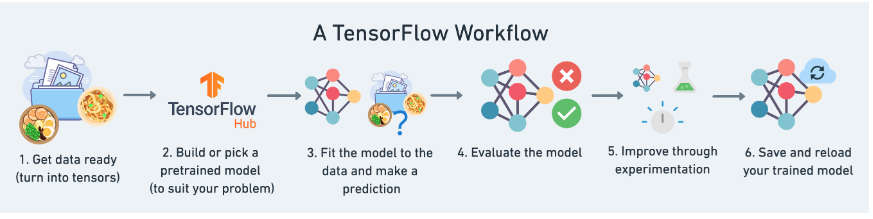


  The workflow we're about to go through is a slightly modified version of the above image. As you keep going through deep learning problems, you'll find the workflow above is more of an outline than a step-by-step guide.

  

#Step 1. Import and become one with the data

Again, we've got a subset of the Food101 dataset. In addition to the pizza and steak images, we've pulled out another eight classes

**We have been through a bunch of the following steps with a binary classificationn problem(pizza and steak), now we are going to step things up a notch with 10 classes of food (Multi Class Classification).**

  1. Become one with the data (visualize, visualize, visualize...)
  2. Preprocess the data (prepare it for a model)
  3. Create a model (start with a baseline)
  4. Fit the model
  5. Evaluate the model
  6. Adjust different parameters and improve model (try to beat your baseline)
  7. Repeat until satisfied


**The data is from the food 101 from kaaggle :** https://www.kaggle.com/datasets/dansbecker/food-101





In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-12-17 07:29:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.79.207, 108.177.96.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  39.4MB/s    in 13s     

2023-12-17 07:29:30 (37.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

#Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in '10_food_classes_all_data' .
There are 10 directories and 0 images in '10_food_classes_all_data/test' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice' .
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream' 

In [15]:
#Setup the train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = '10_food_classes_all_data/test/'

In [11]:
#let's get the class names
import pathlib
import numpy as np

data_dir =pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [12]:
#Let's visualize our images

import matplotlib.pylab as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  #Setup the target directory (We'll view images from here)
  target_folder = target_dir+target_class

  #Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape : {img.shape}") #Print the image shape

  return img

['3839247.jpg']
Image shape : (512, 512, 3)


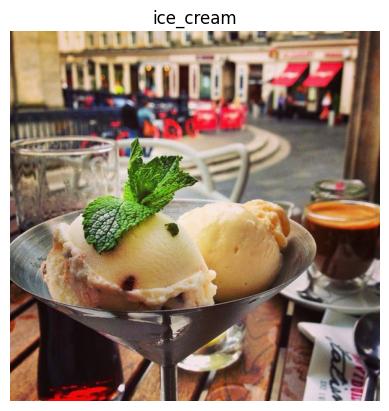

In [13]:
#View  a random Image from the training dataset
import random
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class=random.choice(class_names))


# Step 2. Preprocess the data

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#load the data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size = 32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Step 3 : Create a CNN model (Start with a baseline)

We've been working a lot about CNN explainer website...how about we just take their model (Also 10 layers and replicate it for our problem)



In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Step 4 : Fit a model



In [20]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)))

Epoch 1/5
235/235 [==============================] - 24s 84ms/step - loss: 2.1446 - accuracy: 0.2204 - val_loss: 1.9697 - val_accuracy: 0.2796
Epoch 2/5
235/235 [==============================] - 20s 85ms/step - loss: 1.8901 - accuracy: 0.3420 - val_loss: 1.9052 - val_accuracy: 0.3372
Epoch 3/5
235/235 [==============================] - 19s 81ms/step - loss: 1.6422 - accuracy: 0.4437 - val_loss: 1.8440 - val_accuracy: 0.3520
Epoch 4/5
235/235 [==============================] - 20s 86ms/step - loss: 1.1909 - accuracy: 0.6048 - val_loss: 2.0916 - val_accuracy: 0.3421
Epoch 5/5
235/235 [==============================] - 19s 80ms/step - loss: 0.5861 - accuracy: 0.8159 - val_loss: 3.1297 - val_accuracy: 0.2993


# Step 5 : Evaluate the model

In [22]:
#Evaluate the model

model_9.evaluate(test_data)


79/79 [==============================] - 6s 76ms/step - loss: 2.9363 - accuracy: 0.3060


[2.9362950325012207, 0.3059999942779541]

In [23]:
#Check out the model's loss curves on the 10 classes
#Plot the validation and training curves separately

def plot_loss_curves(history):
  """
  Returns separate loss cureves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #Plot Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()


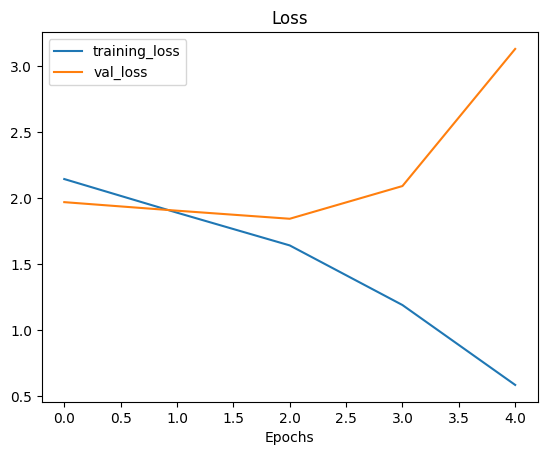

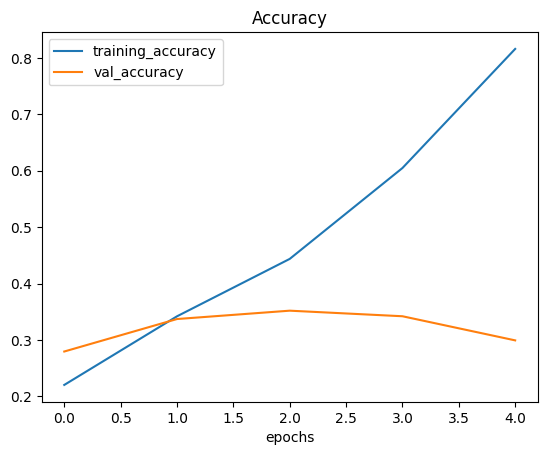

In [24]:
#Plot the loss curves to check

plot_loss_curves(history_9)

**Observation on loss curves :**
Well.. it seems our model is overfitting the training set quite badly..in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on test dataset.

# Step 6 : Adjust the model hyperparameters (to beat the baselie/overftting)

